## Import Libraries and functions

### libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.datasets import load_iris
sns.set()

from scipy.stats.stats import pearsonr

plt.rcParams['figure.figsize'] = 10, 5

### define functions

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds,len(inds))
        bs_x, bs_y = x[bs_inds],y[bs_inds]
        bs_replicates[i] = func(bs_x,bs_y)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_means(data1,data2):
    return np.mean(data1)-np.mean(data2)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

def procedure_bs_diff_means_two_sampled(dist_a,dist_b,size=10000,xlabel=''):

    combined_mean = np.mean(np.concatenate((dist_a,dist_b)))

    mean_a = np.mean(dist_a)
    mean_b = np.mean(dist_b)

    obeserved_value = mean_a-mean_b
    print(observed_value)

    shift_b = dist_b - mean_b + combined_mean
    shift_a = dist_a - mean_a + combined_mean

    bs_reps_a = draw_bs_reps(shift_a,np.mean,size)
    bs_reps_b = draw_bs_reps(shift_b,np.mean,size)
    bs_reps = bs_reps_a-bs_reps_b

    ax=sns.distplot(bs_reps)
    ax.axvline(x=observed_value)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('probability')

    p_value = np.sum(bs_reps>=observed_value)/len(bs_reps)
    print(p_value)
    return ax,p_value

def procedure_perm_diff_means(dist_a,dist_b,size=10000,xlabel=''):

    observed_value = diff_of_means(dist_a,dist_b)
    print(observed_value)

    perm_reps = draw_perm_reps(dist_a,dist_b,diff_of_means,size)

    ax=sns.distplot(perm_reps)
    ax.axvline(x=observed_value)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('prob')

    p_value = np.sum(perm_reps>=observed_value)/len(perm_reps)
    print(p_value)
    return ax,p_value

def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

### datasets

In [4]:
!ls datasets

2008_all_states.csv              finch_beaks_2012.csv
2008_swing_states.csv            fortis_beak_depth_heredity.csv
anscombe.csv                     frog_tongue.csv
bee_sperm.csv                    michelson_speed_of_light.csv
belmont.csv                      mlb_nohitters.csv
female_literacy_fertility.csv    scandens_beak_depth_heredity.csv
finch_beaks_1975.csv             sheffield_weather_station.csv


## Statistical Thinking 1

### Hist, swarm, ECDF

In [12]:
iris = load_iris()
df= pd.DataFrame(iris.data,columns=iris.feature_names)
target_names = dict(zip(range(3),iris.target_names))
df['species'] = iris.target
df['species'] = [target_names[k] for k in df['species']]
display(df.head())

versicolor_petal_length = df[df['species']=='versicolor']['petal length (cm)'].values
versicolor_petal_width = df[df['species']=='versicolor']['petal width (cm)'].values

setosa_petal_length = df[df['species']=='setosa']['petal length (cm)'].values

x_ver,y_ver = ecdf(versicolor_petal_length)

percentiles = np.array([2.5,25,50,75,97.5])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


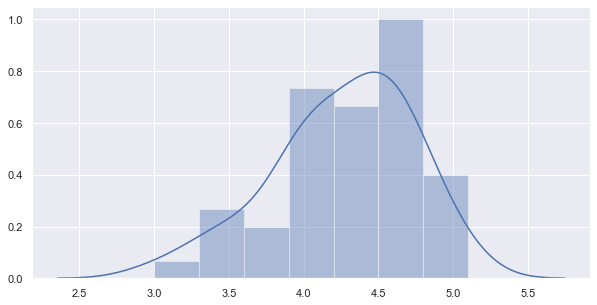

In [13]:
##plot hist
sns.distplot(versicolor_petal_length)

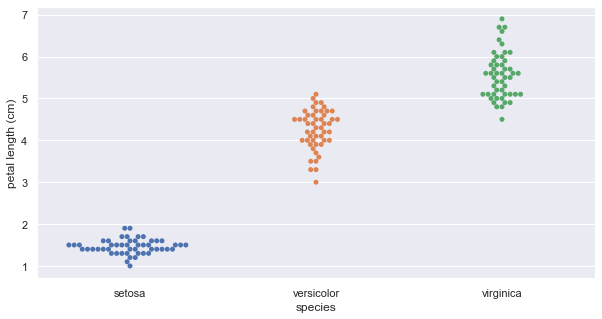

In [14]:
## plot swarmplot
sns.swarmplot(data=df,y='petal length (cm)',x='species')

Text(0, 0.5, 'ECDF (prob)')

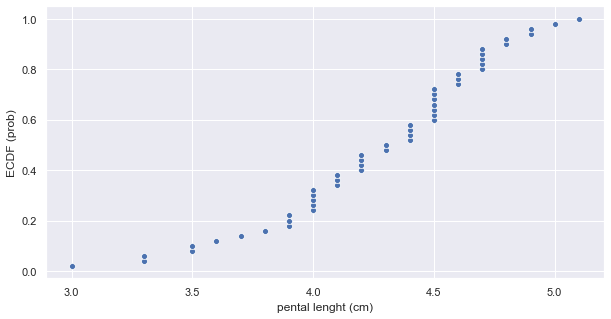

In [15]:
##plot ecdf
x,y = ecdf(versicolor_petal_length)
ax=sns.scatterplot(x=x,y=y)
ax.set_xlabel('pental lenght (cm)')
ax.set_ylabel('ECDF (prob)')

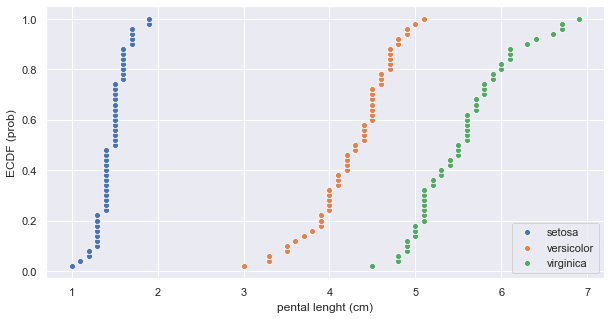

In [16]:
##Compare ecdf
fig,ax=plt.subplots()
for specie in df['species'].unique():
    x,y = ecdf(df[df['species']==specie]['petal length (cm)'])
    sns.scatterplot(x,y,ax=ax,label=specie)

ax.set_xlabel('pental lenght (cm)')
ax.set_ylabel('ECDF (prob)')
ax.legend()

### Percentiles, boxplot

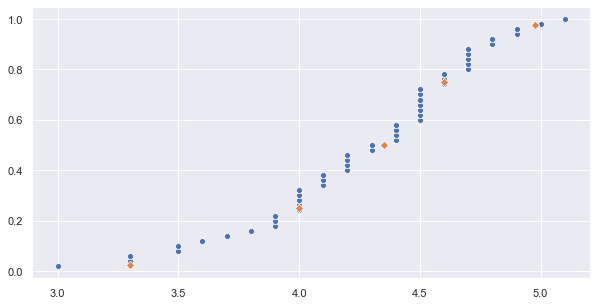

In [17]:
##plot ecdf with percentiles
ptiles_ver = np.percentile(versicolor_petal_length,percentiles)
ax=sns.scatterplot(x_ver,y_ver)
sns.scatterplot(ptiles_ver,percentiles/100,ax=ax,marker='D')

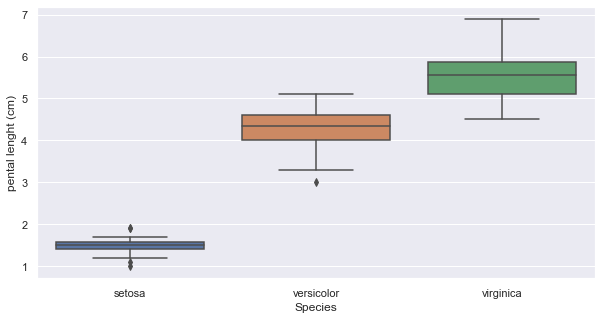

In [18]:
# Create box plot with Seaborn's default settings
sns.boxplot(data=df,x='species',y='petal length (cm)')

# Label the axes
plt.xlabel('Species')
plt.ylabel('pental lenght (cm)')

# Show the plot
plt.show()

### Variance, std, covariance and correlation

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [19]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)


# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[1,0]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [20]:
## Calculate the correlation
pearsonr(versicolor_petal_length,versicolor_petal_width)

(0.7866680885228169, 1.27191570632364e-11)

### Random numbers, Bernoulli trials

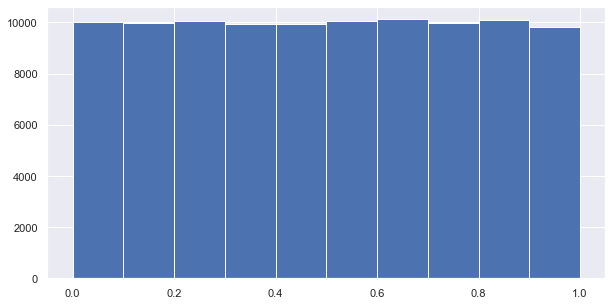

In [21]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(len(random_numbers)):
    random_numbers[i] = np.random.random()

# Plot a histogram
plt.hist(random_numbers)

# Show the plot
plt.show()

#### Bernoulli trials = binomial distribution

The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

##### Bank Defaults

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

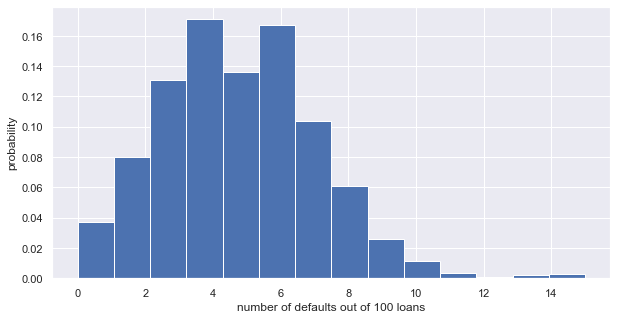

In [22]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] =perform_bernoulli_trials(100,.05)


# Plot the histogram with default number of bins; label your axes
plt.clf()
_ = plt.hist(n_defaults,density=True,bins=14)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

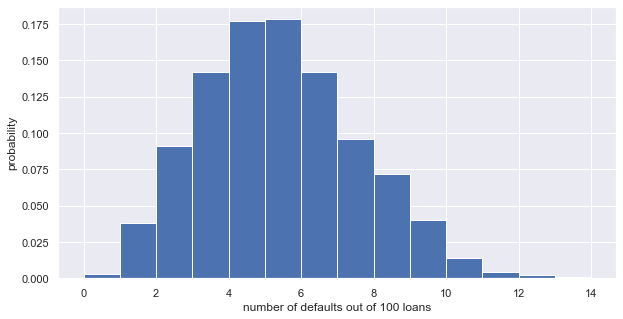

In [23]:
np.random.seed(42)
n_defaults=np.random.binomial(100,0.05,1000)


# Plot the histogram with default number of bins; label your axes
plt.clf()
_ = plt.hist(n_defaults,density=True,bins=14)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

0.021


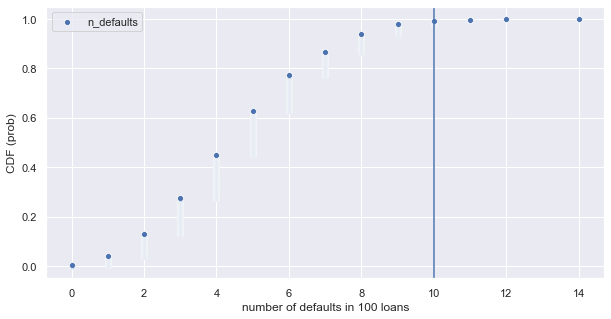

In [24]:
x,y=ecdf(n_defaults)
ax=sns.scatterplot(x,y,label='n_defaults')
ax.set_xlabel('number of defaults in 100 loans')
ax.set_ylabel('CDF (prob)')
ax.axvline(x=10)

p_lose = np.sum((n_defaults>=10))/len(n_defaults)
print(p_lose)

##### Binomial PMF

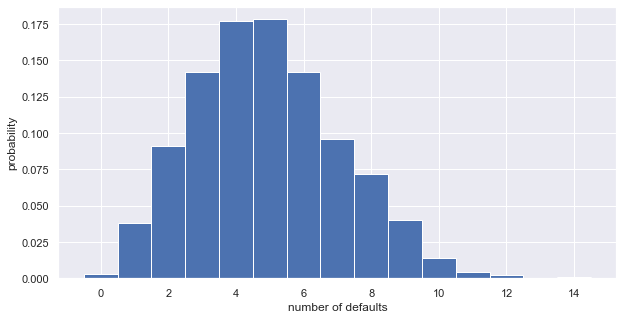

In [25]:
# Compute bin edges: bins
bins = np.arange(0,max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.clf()
plt.hist(n_defaults,bins=bins,density=True)

# Label axes
plt.xlabel('number of defaults')
plt.ylabel('probability')

# Show the plot
plt.show()


### Poisson 

In [26]:
data = pd.read_csv('datasets/mlb_nohitters.csv')
data['date'] = [dt.datetime.strptime(str(k),'%Y%m%d') for k in data['date']]
display(data.head())

nohitter_times = data['game_number'].values

,date,game_number,winning_team,losing_team,winning_pitcher
0,1876-07-15,140,NaN,NaN,NaN
1,1880-06-12,1035,NaN,NaN,NaN
2,1880-06-17,1046,NaN,NaN,NaN
3,1880-08-19,1177,NaN,NaN,NaN
4,1880-08-20,1179,NaN,NaN,NaN


#### Relationship between Binomial and Poisson distributions

You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

#### How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at retrosheet.org (license).

,year,n_nohitters
0,1876,1
1,1880,4
2,1882,3
3,1883,2
4,1884,7


NameError: name 'ax_set_xlabel' is not defined

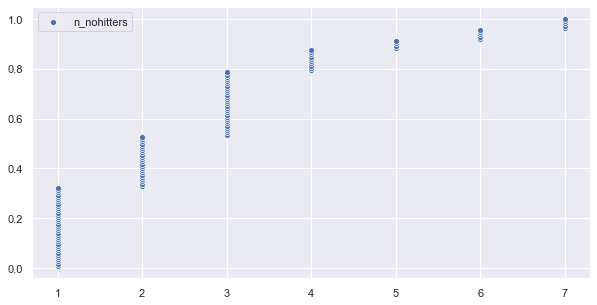

In [27]:
query=data.copy(deep=True)
query['year'] = [k.year for k in query['date']]
query = (query.groupby('year')['game_number']
         .count()
         .reset_index()
         .rename(columns={"game_number":'n_nohitters'}))
display(query.head())

x,y=ecdf(query['n_nohitters'])
ax=sns.scatterplot(x,y,label='n_nohitters')
ax_set_xlabel('number of no hitters in a season')
ax.set_ylabel('ECFD (prob)')

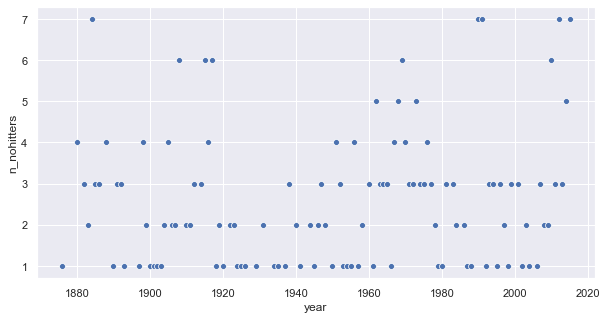

In [28]:
sns.scatterplot(data=query,x='year',y='n_nohitters')

In [29]:
query.nlargest(5,'n_nohitters')

,year,n_nohitters
4,1884,7
88,1990,7
89,1991,7
108,2012,7
111,2015,7


Was 2015 anomalous?

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 (non hitters / games) no-hitters per season, what is the probability of having seven or more in a season?

In [30]:
tau = 251/115

# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(tau,size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large = n_large/len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0068


### Normal

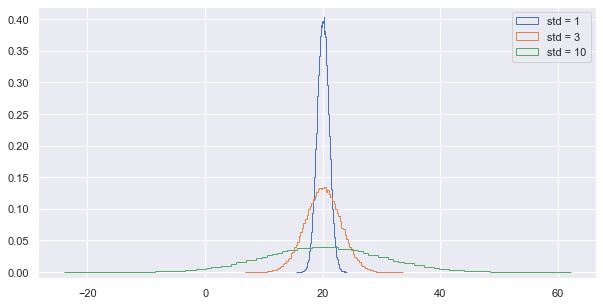

In [31]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)


# Make histograms
plt.clf()
plt.hist(samples_std1,density=True,bins=100,histtype='step')
plt.hist(samples_std3,density=True,bins=100,histtype='step')
plt.hist(samples_std10,density=True,bins=100,histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

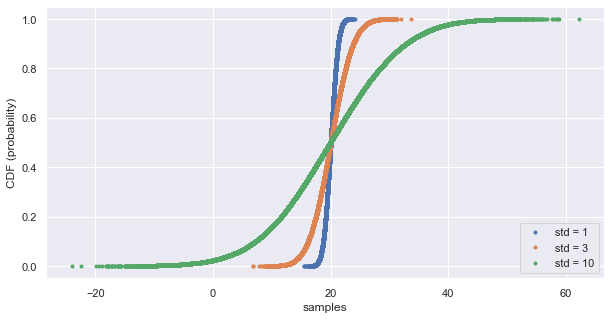

In [32]:
# Generate CDFs

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.clf()
plt.plot(x_std1,y_std1,marker='.',linestyle='none')
plt.plot(x_std3,y_std3,marker='.',linestyle='none')
plt.plot(x_std10,y_std10,marker='.',linestyle='none')
plt.xlabel('samples')
plt.ylabel('CDF (probability)')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


#### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

In [33]:
data = pd.read_csv('datasets/belmont.csv')
data['Time'] = [dt.datetime.strptime(k,'%M:%S.%f') for k in data['Time']]
data['time_s'] = [k.minute*60+k.second+k.microsecond/1000000 for k in data['Time']]
display(data.head())

belmont_no_outliers = data[~data['Year'].isin([1970,1973])]['time_s'].values

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles,time_s
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,1900-01-01 00:02:28.510,Belmont,1.5,148.51
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",1900-01-01 00:02:26.650,Belmont,1.5,146.65
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,1900-01-01 00:02:28.520,Belmont,1.5,148.52
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,1900-01-01 00:02:30.700,Belmont,1.5,150.70
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,1900-01-01 00:02:30.420,Belmont,1.5,150.42


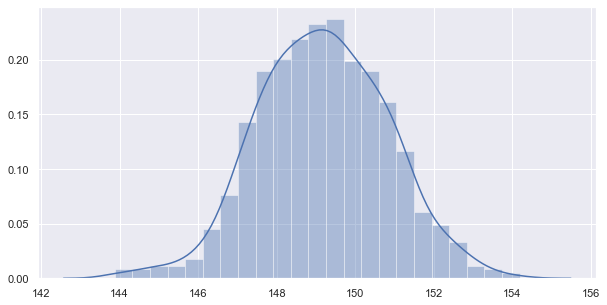

In [35]:
mu,sigma = np.mean(belmont_no_outliers), np.std(belmont_no_outliers)
samples = np.random.normal(mu,sigma,size=1000)

sns.distplot(samples)

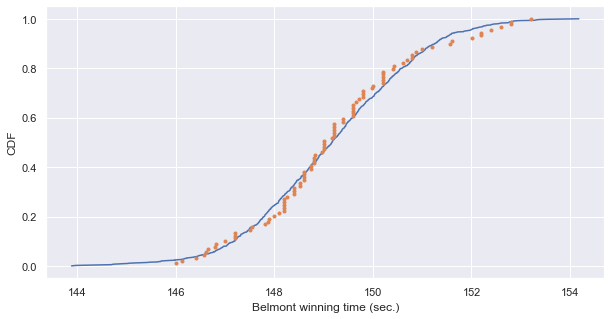

In [36]:
# Get the CDF of the samples and of the data
x,y = ecdf(belmont_no_outliers)
x_theor,y_theor = ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [37]:
# Take a million samples out of the Normal distribution: samples
samples  =np.random.normal(mu,sigma,size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples<144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000581


### Exponential

####  If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

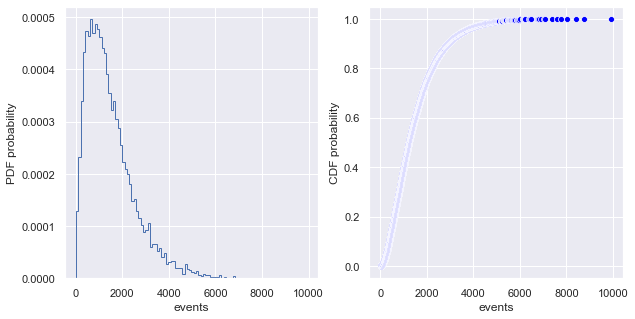

In [38]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764,715,size=10000)


fig,ax = plt.subplots(1,2)
# Make the histogram
ax[0].hist(waiting_times,density=True,bins=100,histtype='step')

# Label axes
ax[0].set_xlabel('events')
ax[0].set_ylabel('PDF probability')


x,y=ecdf(waiting_times)
sns.scatterplot(x,y,ax=ax[1],alpha=1,color='blue')
ax[1].set_xlabel('events')
ax[1].set_ylabel('CDF probability')



# Show the plot
plt.show()


## Statistical Thinking 2

### Optimal parameters

#### How often do we get no-hitters

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.

In [83]:
data = pd.read_csv('datasets/mlb_nohitters.csv')
data['date'] = [dt.datetime.strptime(str(k),'%Y%m%d') for k in data['date']]
data['wait_games'] = data['game_number'].shift(-1) - data['game_number']

nohitter_times = data[data['date']>='1901'].dropna(subset=['wait_games'])['wait_games'].values

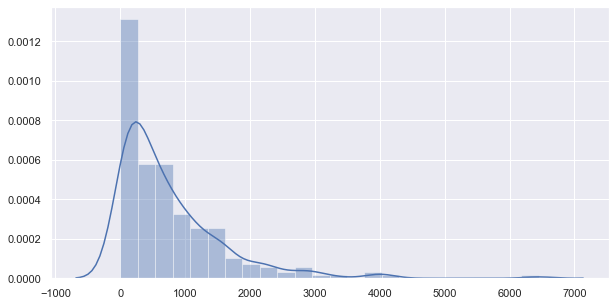

In [84]:
sns.distplot(nohitter_times)

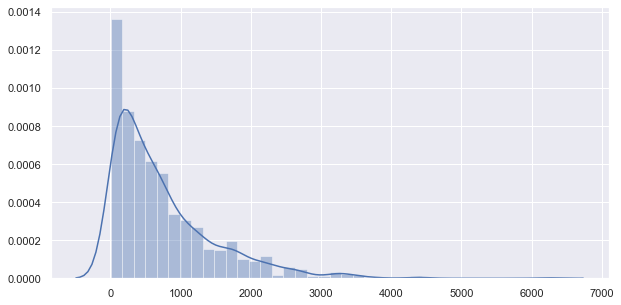

In [88]:
np.random.seed(42)
tau=np.mean(nohitter_times)
samples = np.random.exponential(tau,1000)
sns.distplot(samples)

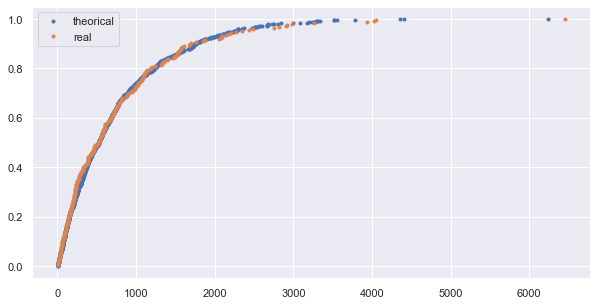

In [89]:
fig,ax=plt.subplots()

xt,yt = ecdf(samples)
ax.plot(xt,yt,label='theorical',marker='.',linestyle='none')

xr,yr = ecdf(nohitter_times)
ax.plot(xr,yr,label='real',marker='.',linestyle='none')

ax.legend()

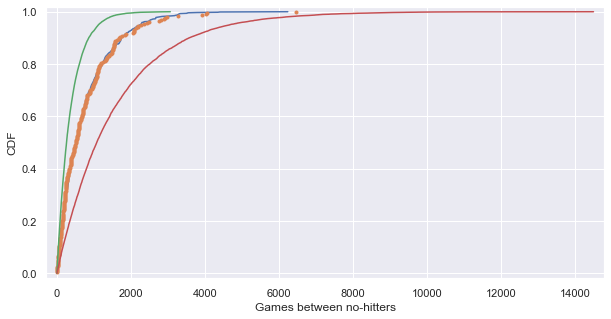

In [91]:
# Plot the theoretical CDFs
plt.plot(xt, yt)
plt.plot(xr, yr, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2,size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

### Linear regression

#### EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

In [103]:
data = pd.read_csv('datasets/female_literacy_fertility.csv')
data['illiteracy'] = 100 - data['female literacy']
illiteracy = data['illiteracy'].values
fertility = data['fertility'].values

display(data.head())

,Country,Continent,female literacy,fertility,population,illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8


(0.8041324026815345, 5.635092985976583e-38)


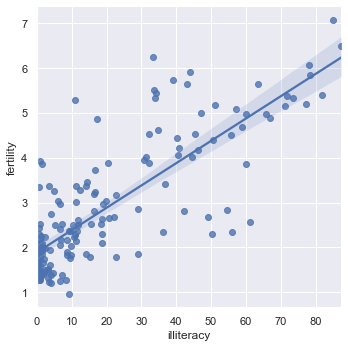

In [104]:
sns.lmplot(data=data, x='illiteracy',y='fertility')
print(pearsonr(data['illiteracy'],data['fertility']))

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


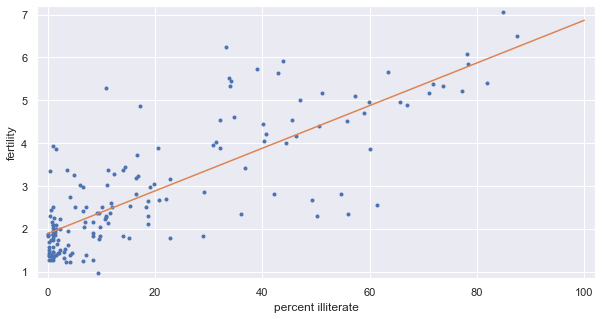

In [105]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x,y)

# Draw the plot
plt.show()


#### RSS X a - How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?



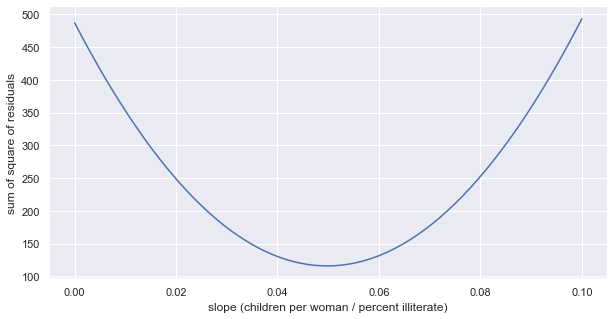

In [107]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

### Bootstrap Replicates

In [164]:
data = pd.read_csv('datasets/sheffield_weather_station.csv',sep=',')
data = data.reset_index(drop=True).drop(['empty'],axis=1)
display(data.head())

rainfall = data[data['yyyy']<=2015]['rain'].values

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


#### Visualizing bootstrap samples
In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

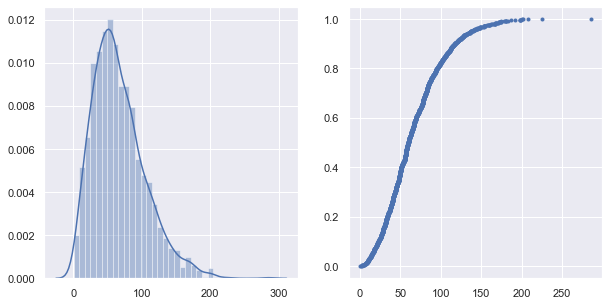

In [166]:
fig,ax = plt.subplots(1,2)
sns.distplot(rainfall,ax=ax[0])
x,y = ecdf(rainfall)
ax[1].plot(x,y,'.',linestyle='none')

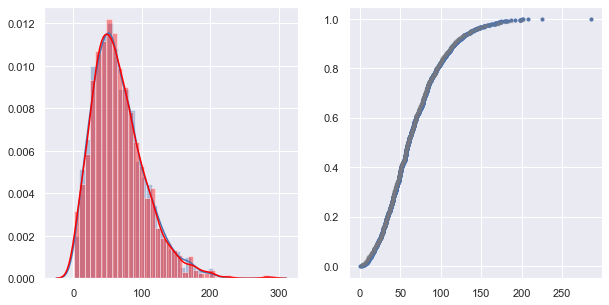

In [167]:
##generate bootstrap samples
bs_samples = np.random.choice(rainfall,len(rainfall))
xs,ys = ecdf(bs_samples)

fig,ax = plt.subplots(1,2)
sns.distplot(rainfall,ax=ax[0])
sns.distplot(bs_samples,ax=ax[0],color='red')

x,y = ecdf(rainfall)
ax[1].plot(x,y,'.',linestyle='none')
ax[1].plot(xs,ys,'.',linestyle='none',color='gray',alpha=0.1)

### Confidence Interval 

#### Bootstrap replicates of the mean and the SEM

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

66.67431077694235
66.71720733082708
[64.95       68.61309837]


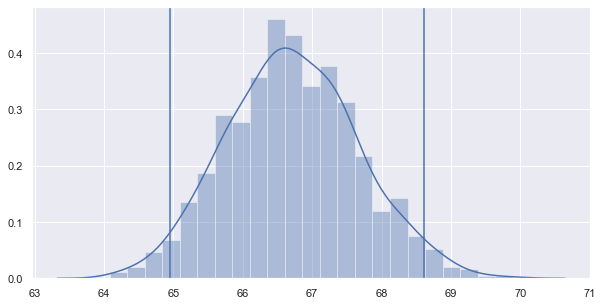

In [168]:
obeserved_values = np.mean(rainfall)
print(obeserved_values)

## generate bs replicates
bs_reps = draw_bs_reps(rainfall,np.mean,1000)
print(np.mean(bs_reps))

##calculate the confidence interval
ci = np.percentile(bs_reps,[2.5,97.5])
print(ci)

ax=sns.distplot(bs_reps)
ax.axvline(x=ci[0])
ax.axvline(x=ci[1])

#### Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

1443.6480743996583
[1320.92140429 1579.24037988]


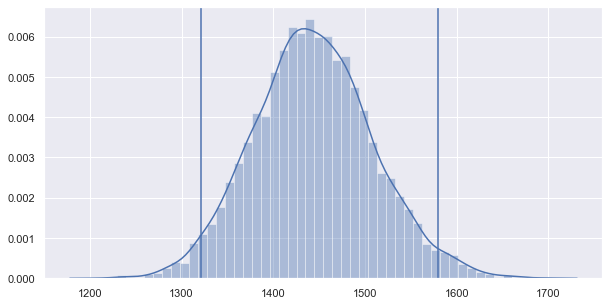

In [171]:
obeserved_values = np.var(rainfall)
print(obeserved_values)

## generate bs replicates
bs_reps = draw_bs_reps(rainfall,np.var,10000)

##calculate the confidence interval
ci = np.percentile(bs_reps,[2.5,97.5])
print(ci)

ax=sns.distplot(bs_reps)
ax.axvline(x=ci[0])
ax.axvline(x=ci[1])

#### Confidence interval on the rate of no-hitters
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter τ. Plot a histogram of your replicates and report a 95% confidence interval.

763.716
[663.4158 870.2881]


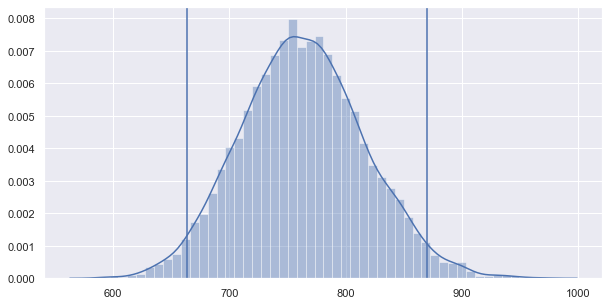

In [174]:
tau = np.mean(nohitter_times)
print(tau)

## generate bs replicates
bs_reps = draw_bs_reps(nohitter_times,np.mean,10000)

##calculate the confidence interval
ci = np.percentile(bs_reps,[2.5,97.5])
print(ci)

ax=sns.distplot(bs_reps)
ax.axvline(x=ci[0])
ax.axvline(x=ci[1])

### Pairs Bootstrap

#### A function to do pairs bootstrap
As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

#### Pairs bootstrap of literacy/fertility data
Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

[0.04979855 1.88805061]
0.04985357396719345
[0.04422436 0.05539634]


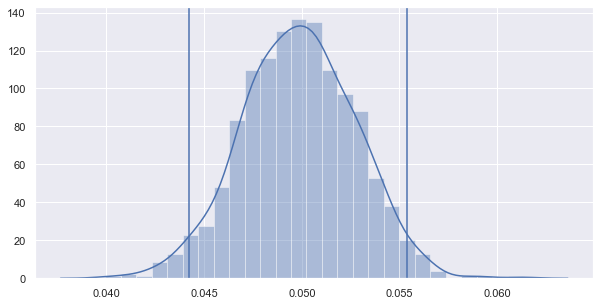

In [178]:
obeserved_values = np.polyfit(illiteracy,fertility,1)
print(obeserved_values)

## generate bs replicates
bs_slopes, bs_intercepts = draw_bs_pairs_linreg(illiteracy,fertility,1000)
print(np.mean(bs_slopes))

##calculate the confidence interval
ci = np.percentile(bs_slopes,[2.5,97.5])
print(ci)

ax=sns.distplot(bs_slopes)
ax.axvline(x=ci[0])
ax.axvline(x=ci[1])

#### Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

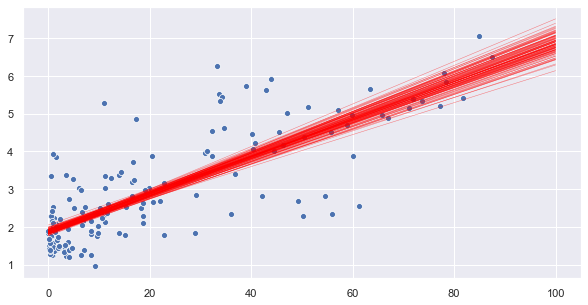

In [180]:
fig, ax = plt.subplots()

x = np.array([0,100])
for i in range(100):
    ax.plot(x,bs_slopes[i]*x+bs_intercepts[i],linewidth=.5,alpha=0.5,color='red')
    
sns.scatterplot(illiteracy,fertility,ax=ax)

### Permutations

#### Generating a permutation sample
In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

In [183]:
data = pd.read_csv('datasets/sheffield_weather_station.csv')
display(data.head())

rainfall = data['rain'].values
rain_june = data[data['mm']==6]['rain'].values
rain_november= data[data['mm']==11]['rain'].values

,empty,yyyy,mm,tmax,tmin,af,rain,sun
0,NaN,1883,1,6.3,1.7,6,122.1,---
1,NaN,1883,2,8.0,2.8,2,69.8,---
2,NaN,1883,3,4.8,-1.6,23,29.6,---
3,NaN,1883,4,12.2,3.8,2,74.0,---
4,NaN,1883,5,14.7,6.2,0,31.2,---


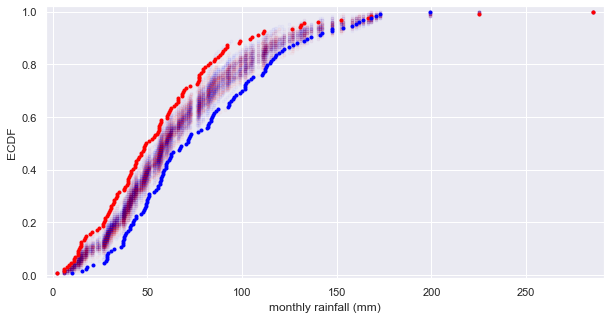

In [184]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

#### Generating permutation replicates
As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

In [186]:
def draw_perm_replicates(data_1,data_2,func,size):
    perm_reps = np.empty(shape=size)
    for i in range(size):
        perm1,perm2 = permutation_sample(data_1,data_2)
        perm_reps[i] = func(perm1,perm2)
    
    return perm_reps

### Hypothesis Testing

**TEMPLATE**

- **CASE**:
- **NH**: 
- **TEST**:
- **Real data**: 
- **Simulated Data**: 
- **P_Value**:

#### Frogs - EDA before hypothesis testing

In [235]:
df = pd.read_csv('datasets/frog_tongue.csv')
display(df.head())

force_a = df[df['ID']=='II']['impact force (mN)'].values/1000
force_b = df[df['ID']=='IV']['impact force (mN)'].values/1000

df.columns

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


Index(['date', 'ID', 'trial number', 'impact force (mN)', 'impact time (ms)',
       'impact force / body weight', 'adhesive force (mN)',
       'time frog pulls on target (ms)', 'adhesive force / body weight',
       'adhesive impulse (N-s)', 'total contact area (mm2)',
       'contact area without mucus (mm2)',
       'contact area with mucus / contact area without mucus',
       'contact pressure (Pa)', 'adhesive strength (Pa)'],
      dtype='object')

##### Look before you leap: EDA before hypothesis testing
Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

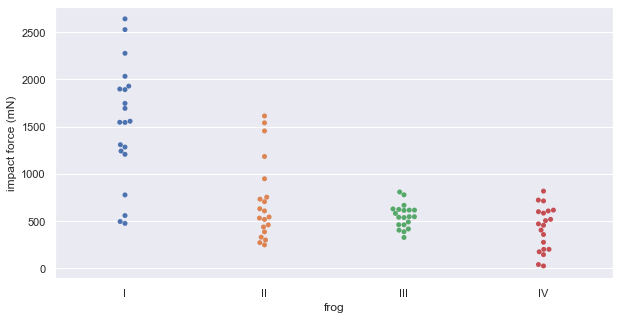

In [236]:
# Make bee swarm plot
_ = sns.swarmplot(data=df,x='ID',y='impact force (mN)')

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (mN)')

# Show the plot
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

##### Distribution of frogs tongue impact

- **CASE**: Given the distributions for the hit impact for two frogs, A and B. The distributions appear to be different.
- **NH**: The difference in the distributions are due to random chance. They are actually the same
- **TEST**: If you permute the distributions, the difference in the mean is bigger than the original difference. Which means that the original difference is not significant.
- **Real data**: Distribution I and Distribution II. The observed value is the difference on the mean of the distributions
- **Simulated Data**: generate permutation samples and use the difference of the mean to calculate the permutations reps
- **P_Value**: check the number of cases where the permutation replicates are at least as extreme as the observed value. 

0.28825000000000006
0.0063


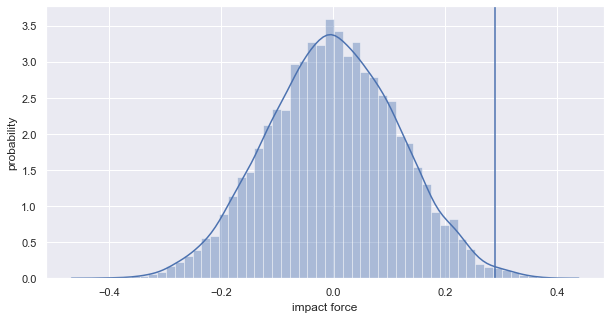

In [238]:
np.random.seed(42)

##real data
observed_value = diff_means(force_a,force_b)
print(observed_value)

##simulated data
perm_reps = draw_perm_replicates(force_a,force_b,diff_means,10000)

ax=sns.distplot(perm_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('impact force')
ax.set_ylabel('probability')


p_value = np.sum(perm_reps>=observed_value)/len(perm_reps)
print(p_value)

#### A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

##### The distributions have the same mean - one-sample version
- **CASE**: Given the distribution for the hit impact of one frog B, and the mean impact for another frog C, the mean of B is smaller than the mean of C.
- **NH**: The means are the same. The fact that the mean of B is less than the mean of C is due to random chance.
- **TEST**: If we normalize so that the distribution B has the same mean as C, we can generate many samples using bootstrap and calculate the bootstrap replicates using the mean.
- **Real data**: Distribution B and mean of C. The observed value is the mean of B
- **Simulated Data**: generate bootstrap samples and use the mean to calculate the bootstrap replicates
- **P_Value**: check the number of cases where the bootstrap replicates are at least as extreme as the observed value. Since in the original case, the mean of B is lower than C, then we verify in which cases the bs_reps is smaller than mean of B. 

0.0055


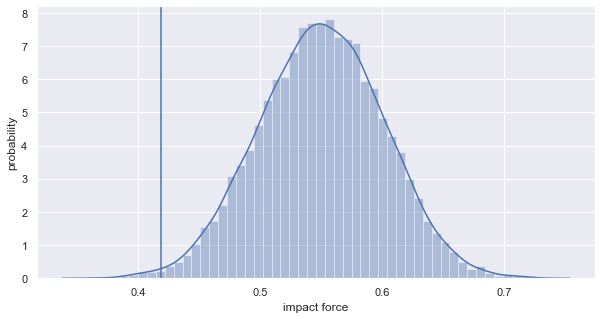

In [255]:
observed_value = np.mean(force_b)
mean_c = .55

shift_force_b = force_b - observed_value + mean_c

bs_reps = draw_bs_reps(shift_force_b,np.mean,10000)

ax=sns.distplot(bs_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('impact force')
ax.set_ylabel('probability')

p_value = np.sum(bs_reps<=observed_value)/len(bs_reps)
print(p_value)

The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

#### A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

##### The distributions have the same mean, two samples version

- **CASE**: Given the distributions for the hit impact for two frogs A and B,the mean of B is smaller than the mean of A.
- **NH**: The means are the same. The fact that the mean of B is less than the mean of A is due to random chance.
- **TEST**: If we normalize both distributions so that they have the same mean, we can generate many samples using bootstrap and calculate the bootstrap replicates using the difference in the means.
- **Real data**: Distributions A and B. The observed value is the difference of the means
- **Simulated Data**: generate bootstrap samples and use the mean to calculate the bootstrap replicates for each distributions, then use them to calculate the final bs_reps with the difference of the means.
- **P_Value**: check the number of cases where the bootstrap replicates are at least as extreme as the observed value. If many of the bs_reps have a difference bigger than the one observed, than the one observed is not significant.

0.0001


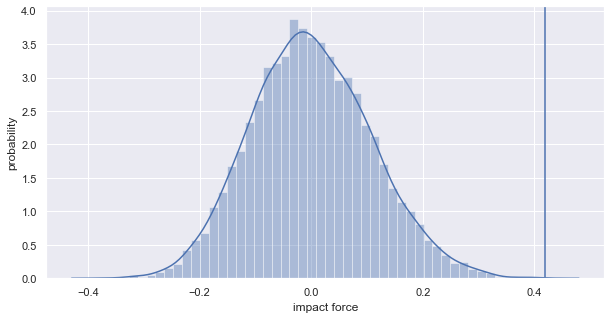

In [244]:
combined_mean = np.mean(np.concatenate((force_a,force_b)))

mean_a = np.mean(force_a)
mean_b = np.mean(force_b)

observed_value = mean_a-mean_b

shift_b = force_b - mean_b + combined_mean
shift_a = force_a - mean_a + combined_mean

bs_reps_a = draw_bs_reps(shift_a,np.mean,10000)
bs_reps_b = draw_bs_reps(shift_b,np.mean,10000)
bs_reps = bs_reps_a-bs_reps_b

ax=sns.distplot(bs_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('impact force')
ax.set_ylabel('probability')

p_value = np.sum(bs_reps>=observed_value)/len(bs_reps)
print(p_value)

#### A/B Testing

##### Is your redesign effective

In an experiment, 500 people were directed to a page with a new design and 500 were directed to the page with the old design. For the new, 67 people click in the button and for the old, only 45. 

- **CASE**: Understand if the new design made the conversion rate to increase. 
- **NH**: There is no difference between the designs and the difference in conversion rate is due to random chance 
- **TEST**: Permute the users and see if the difference in conversion rate is affected.
- **Real data**: distribution of users in new page and distribution of users in old page. Observed data is the true difference in conversion rates
- **Simulated Data**: make permutations of the users and use the difference in conversion rate to calculate the permutation replicates
- **P_Value**: check the number of cases where the reps are at least as extreme as the observed data. If there are many reps smaller than the observed value, than the small observed value is not significant.

0.04400000000000001
0.0178


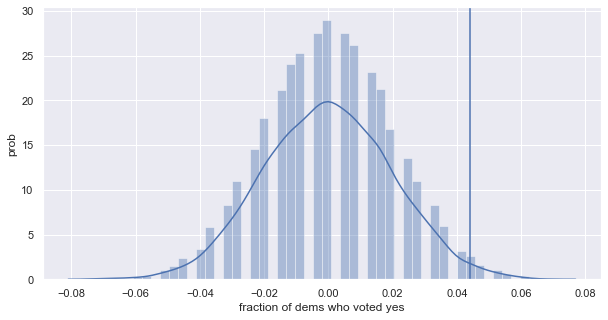

In [261]:
old = np.array([True] * 67 + [False] * 433)
new = np.array([True] * 45 + [False] * 455)

observed_value = diff_frac(new,old)
print(observed_value)

perm_reps = draw_perm_reps(old,new,diff_frac,10000)

ax=sns.distplot(perm_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('fraction of dems who voted yes')
ax.set_ylabel('prob')

p_value = np.sum(perm_reps>=observed_value)/len(perm_reps)
print(p_value)

##### The vote for the Civil Rights Act in 1964

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

- **CASE**: Given the distributions for the democrats and republicans who vote yes, or not, we assume that the party affiliation interferes in the vote. 
- **NH**: Party affiliation does not interfere in the vote and the fraction of yes votes is due to chance.
- **TEST**: If we permute all the voters and observe how the fraction of dem that voted yes change, we can see if the affiliation affects the results. 
- **Real data**: Distributions of Dem and distributions for Rep. The observed value is the fraction of yes for the democrats.
- **Simulated Data**: generate permutations samples with all the voters and use the fraction of yes for the democrats to calculate the permutations replicates.
- **P_Value**: check the number of cases where the permutation replicates are at least as extreme as the observed value. If many of the perm_reps have a fraction of yes for the dem smaller than the one observed, than the one observed is not significant.

0.6270491803278688
0.0001


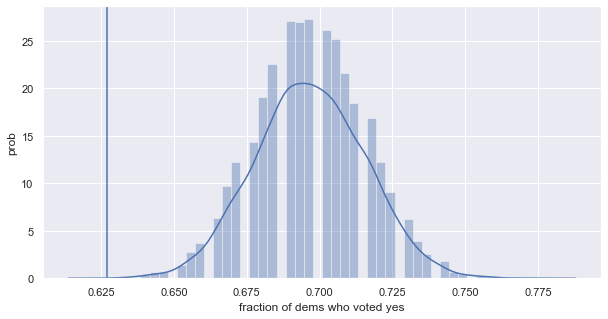

In [267]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

observed_value = frac_yea_dems(dems,reps)
print(observed_value)

perm_reps = draw_perm_reps(dems,reps,frac_yea_dems,10000)

ax=sns.distplot(perm_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('fraction of dems who voted yes')
ax.set_ylabel('prob')

p_value = np.sum(perm_reps<=observed_value)/len(perm_reps)
print(p_value)

This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

Using the AB Test approach considering party as the design

- **CASE**: Understand if the party affects the votes. 
- **NH**: There is no difference between the votes due to party and the difference in vote rate is due to random chance 
- **TEST**: Permute the voters and see if the difference in vote rate is affected.
- **Real data**: distribution of dem and rep voters. Observed data is the true difference in fraction votes.
- **Simulated Data**: make permutations of the voters and use the difference in vote rates to calculate the permutation replicates
- **P_Value**: check the number of cases where the reps are at least as extreme as the observed data. If there are many reps smaller than the observed value, than the small observed value is not significant.

0.1682724570990317
0.0002


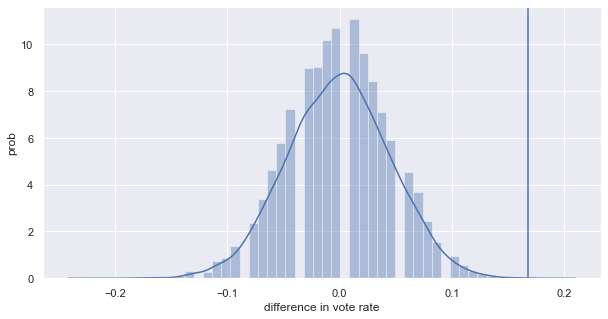

In [266]:
np.random.seed(42)

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

observed_value = diff_frac(dems,reps)
print(observed_value)

perm_reps = draw_perm_reps(dems,reps,diff_frac,10000)

ax=sns.distplot(perm_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('difference in vote rate')
ax.set_ylabel('prob')

p_value = np.sum(perm_reps>=observed_value)/len(perm_reps)
print(p_value)

#### A time-on-website analog

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) 

You will use the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

In [275]:
data = pd.read_csv('datasets/mlb_nohitters.csv')
data['date'] = [dt.datetime.strptime(str(k),'%Y%m%d') for k in data['date']]
data['wait_games'] = data['game_number'].shift(-1) - data['game_number']

nohitter_times = data[data['date']>='1901'].dropna(subset=['wait_games'])['wait_games'].values

nth_dead = data[data['date']<'1920'].dropna(subset=['wait_games'])['wait_games'].values
nth_live = data[data['date']>='1920'].dropna(subset=['wait_games'])['wait_games'].values

**Using bootstrap**

- **CASE**: Understand the change in the rule in 1920 changed the rate of no hitters. The rate after is smaller than the rate before the rule 
- **NH**: There is no difference between rates. The observed difference is due random chance 
- **TEST**: Consider the rate as the mean of games between no hitters. We want to test the means, so we can shift the distributions to a combined mean and use bootstrap to generate bootstrap samples. We then use the mean to calculate respective bootstrap replicates and create final bs_reps using bs_rep_b - bs_rep_a.
- **Real data**: distribution for before, B, and after, A, the change in the rule. Observed data is the difference in the means for before minus after.
- **Simulated Data**: calculate combined mean, shifted distributions, bootstrap the samples from shifted, calculate bs_reps using the bootstrap samples and the means.
- **P_Value**: check the number of cases where the reps are at least as extreme as the observed data. If there are many reps bigger than the observed value, than the high observed value is not significant.

338.78691110869335
0.0001


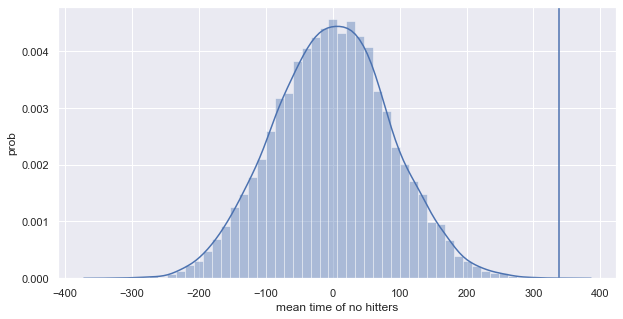

In [277]:
observed_value = diff_means(nth_live,nth_dead)
print(observed_value)

combined_mean = np.mean(np.concatenate((nth_dead,nth_live)))

s_dead = nth_dead - np.mean(nth_dead) + combined_mean
s_live = nth_live - np.mean(nth_live) + combined_mean

bs_reps_dead = draw_bs_reps(s_dead,np.mean,10000)
bs_reps_live = draw_bs_reps(s_live,np.mean,10000)
bs_reps = bs_reps_live-bs_reps_dead

ax=sns.distplot(bs_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('mean time of no hitters')
ax.set_ylabel('prob')

p_value = np.sum(bs_reps>=observed_value)/len(bs_reps)
print(p_value)

**Using permutation**

- **CASE**: Understand the change in the rule in 1920 changed the rate of no hitters. The rate after is bigger than the rate before the rule 
- **NH**: There is no difference between rates. The observed difference is due random chance 
- **TEST**: Consider the rate as the mean of games between no hitters. We want to test the means, so we can permute the values and calculate the perm_reps using the mean.
- **Real data**: distribution for before, B, and after, A, the change in the rule. Observed data is the difference in the means for after minus before.
- **Simulated Data**: simulated permutations and perm_reps using the mean
- **P_Value**: check the number of cases where the reps are at least as extreme as the observed data. If there are many reps bigger than the observed value, than the high observed value is not significant.

338.78691110869335
0.0001


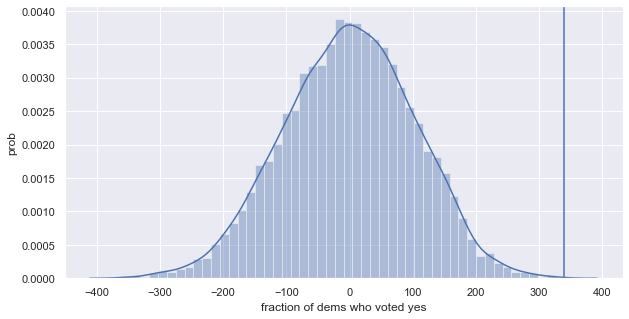

In [282]:
observed_value = diff_of_means(nth_live,nth_dead)
print(observed_value)

perm_reps = draw_perm_reps(nth_live,nth_dead,diff_of_means,10000)

ax=sns.distplot(perm_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('fraction of dems who voted yes')
ax.set_ylabel('prob')

p_value = np.sum(perm_reps>=observed_value)/len(perm_reps)
print(p_value)

Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

#### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

- **CASE**: The illiteracy and fertility rate are correlated.
- **NH**: There is no correlation between the rates and the observed results is due to random chance 
- **TEST**: Consider the pearson coeficient between the distributions. Permute one of the distribution to create the permutations samples and use the pearson to get the perm_reps
- **Real data**: illiteracy and fertility distributions. Observed data is the original correlation
- **Simulated Data**: simulated permutations and perm_reps using the pearson correlation.
- **P_Value**: check the number of cases where the reps are at least as extreme as the observed data. If there are many reps bigger than the observed value, than the high observed value is not significant.

In [284]:
data = pd.read_csv('datasets/female_literacy_fertility.csv')
data['illiteracy'] = 100 - data['female literacy']
illiteracy = data['illiteracy'].values
fertility = data['fertility'].values

display(data.head())

,Country,Continent,female literacy,fertility,population,illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8


0.8041324026815345
0.0


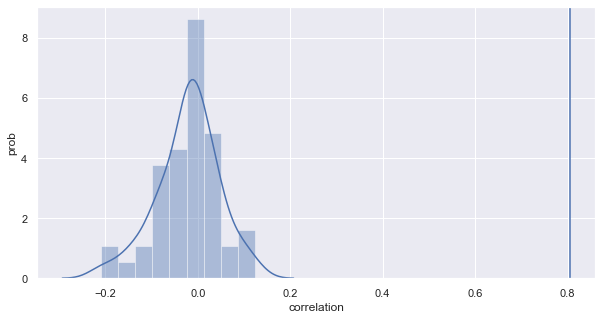

In [285]:
observed_value = pearsonr(illiteracy,fertility)[0]
print(observed_value)

bs_reps = np.empty(50)
for i in range(50):
    bs_sample = np.random.choice(illiteracy,len(illiteracy))
    bs_reps[i] = pearsonr(bs_sample,fertility)[0]
    
ax=sns.distplot(bs_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('correlation')
ax.set_ylabel('prob')

p_value = np.sum(bs_reps>=observed_value)/len(bs_reps)
print(p_value)

In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

#### Do neonicotinoid insecticides have unintended consequences?

You will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

In [299]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

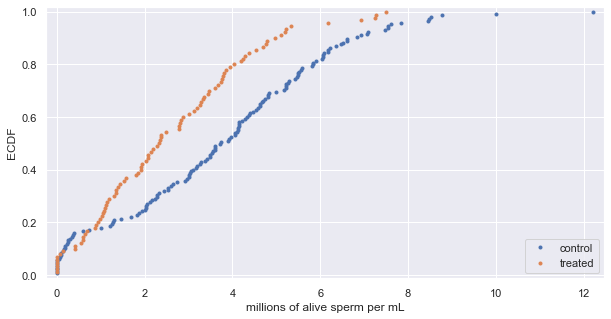

In [300]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

**Using Permutation**

- **CASE**: Understand if medication affects the count of sperm alive 
- **NH**: There is no difference between the means and the observed value is due to random chance 
- **TEST**: Permute the bees and see if the difference of the means is affected.
- **Real data**: distribution of control and treated. Observed data is the true difference means.
- **Simulated Data**: make permutations of the groups and use the difference in means to calculate the permutation replicates
- **P_Value**: check the number of cases where the reps are at least as extreme as the observed data. If there are many reps smaller than the observed value, than the small observed value is not significant.

1.1460587295019158
0.0001


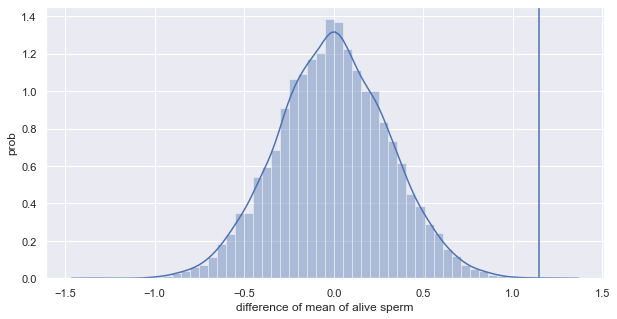

In [307]:
np.random.seed(42)

observed_value = diff_of_means(control,treated)
print(observed_value)

perm_reps = draw_perm_reps(control,treated,diff_of_means,10000)

ax=sns.distplot(perm_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('difference of mean of alive sperm')
ax.set_ylabel('prob')

p_value = np.sum(perm_reps>=observed_value)/len(perm_reps)
print(p_value)

1.1460587295019158
0.0


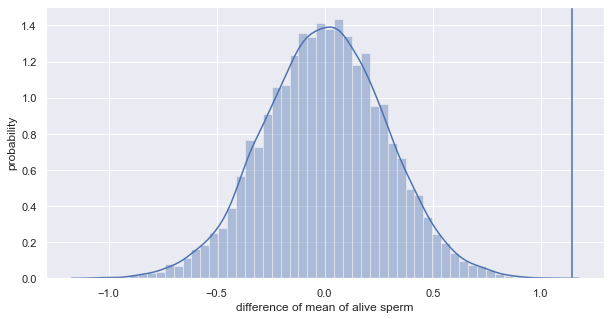

In [306]:
##using bootstrap
combined_mean = np.mean(np.concatenate((control,treated)))

mean_a = np.mean(control)
mean_b = np.mean(treated)

obeserved_value = mean_a-mean_b
print(observed_value)

shift_b = treated - mean_b + combined_mean
shift_a = control - mean_a + combined_mean

bs_reps_a = draw_bs_reps(shift_a,np.mean,10000)
bs_reps_b = draw_bs_reps(shift_b,np.mean,10000)
bs_reps = bs_reps_a-bs_reps_b

ax=sns.distplot(bs_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('difference of mean of alive sperm')
ax.set_ylabel('probability')

p_value = np.sum(bs_reps>=observed_value)/len(bs_reps)
print(p_value)

## Study case: Beak depth of Darwin's finches

In [403]:
df2012= pd.read_csv('datasets/finch_beaks_2012.csv')
df1975= pd.read_csv('datasets/finch_beaks_1975.csv')

df2012['year']=2012
df1975['year']=1975
df1975.columns = ['band', 'specied','beak_length','beak_depth','year']
df2012.columns = ['band', 'specied','beak_length','beak_depth','year']

df=df1975.append(df2012,ignore_index=True)
df.columns = ['band', 'species','beak_length','beak_depth','year']

scadens = df[df['species']=='scandens']

bd_1975 = scadens[scadens['year']==1975]['beak_depth'].values
bd_2012 = scadens[scadens['year']==2012]['beak_depth'].values

bl_1975 = scadens[scadens['year']==1975]['beak_length'].values
bl_2012 = scadens[scadens['year']==2012]['beak_length'].values

display(df.head())

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


### EDA of beak depths of Darwin's finches

For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

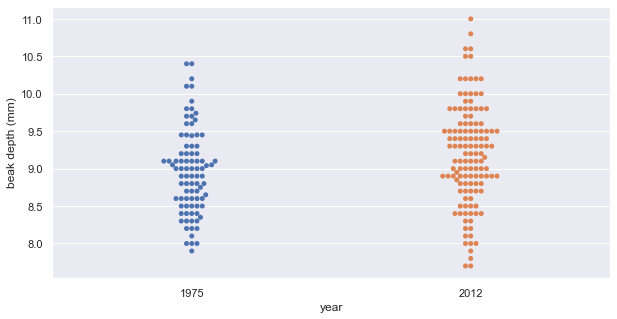

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1975,87.0,8.96000,0.566595,7.9,8.55,9.0,9.25,10.4
2012,127.0,9.18622,0.669241,7.7,8.80,9.2,9.60,11.0


In [337]:
# Create bee swarm plot
_ = sns.swarmplot(data=scadens,x='year',y='beak_depth')

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

#chech the statistics
display(scadens.groupby('year')['beak_depth'].describe())

Text(0, 0.5, 'ECDF')

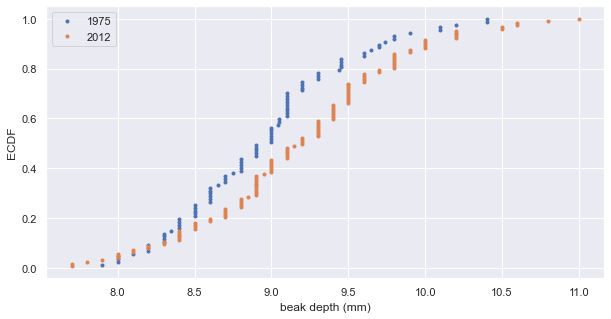

In [342]:
##plot the ecdf
x,y = ecdf(bd_1975)
fig,ax = plt.subplots()
ax.plot(x,y,'.',linestyle='none',label='1975')

x,y = ecdf(bd_2012)
ax.plot(x,y,'.',linestyle='none',label='2012')
ax.legend()

ax.set_xlabel('beak depth (mm)')
ax.set_ylabel('ECDF')

##### get the confidence interval

0.22622047244094645
[0.05607218 0.38989868]


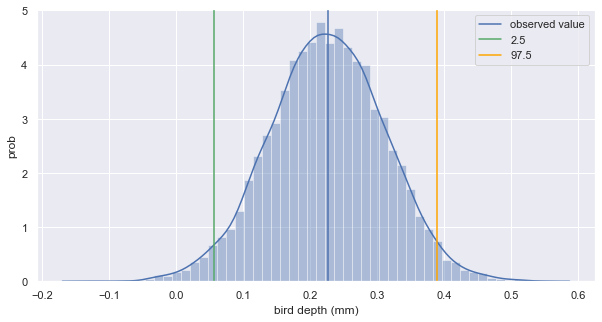

In [368]:
np.random.seed(42)

dist_a, dist_b=bd_2012, bd_1975
size=10000
xlabel='bird depth (mm)'

mean_a = np.mean(dist_a)
mean_b = np.mean(dist_b)

obeserved_value = mean_a-mean_b
print(observed_value)

bs_reps_a = draw_bs_reps(dist_a,np.mean,size)
bs_reps_b = draw_bs_reps(dist_b,np.mean,size)
bs_reps = bs_reps_a-bs_reps_b

ax=sns.distplot(bs_reps)
ax.axvline(x=observed_value,label='observed value')

ci = np.percentile(bs_reps,[2.5,97.5])
ax.axvline(x=ci[0],label='2.5',color='g')
ax.axvline(x=ci[1],label='97.5',color='orange')
print(ci)

ax.set_xlabel(xlabel)
ax.set_ylabel('prob')
ax.legend()

### Hypothesis Test - Beak Depth

#### Hypothesis test: Are beaks deeper in 2012?

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

##### Get the differences of means for the years

- **CASE**: There are measurements for beaks for scadens in two years. The mean for 2012 is different than 1975
- **NH**: The mean in 2012 is not different than 1975 and the observed value is due to random chance. Actually the means are the same
- **TEST**: two sample test. Get a common mean and shift the distributions accordily. Generate bootstrap samples and use mean to calculate respective bootstrap replicated for each mean. Then perform the difference of means to get the bs_reps
- **Real data**: distribution for 1975 and 2012. The observed value if the difference of means between the years
- **Simulated Data**: bs_reps for each year using bs_samples and means. final bs_reps with the difference between the means
- **P_Value**: sum of the values that are at least as extreme as the observed value. If there are many bs_reps bigger than the observed value, it means that the high observed value is not significant.

0.22622047244094645
0.0037


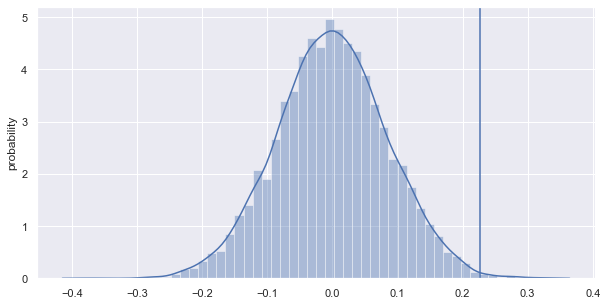

In [369]:
p,ax=procedure_bs_diff_means_two_sampled(bd_2012,bd_1975,size=10000,xlabel='')

We get a p-value of 0.0034, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### EDA of beak length and depth

#### linear correlation

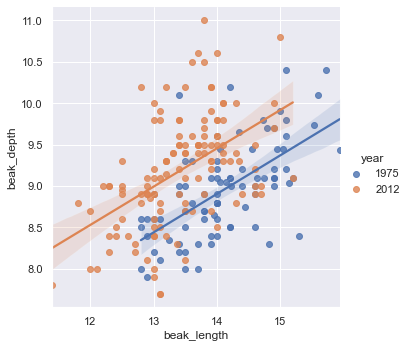

In [386]:
sns.lmplot(data=scadens,x='beak_length',y='beak_depth',hue='year')

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

In [387]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975,bd_1975,size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012,bd_2012,size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.34131104 0.58248959]
1975: intercept = 2.3908752365842263 conf int = [0.73694269 4.18109593]
2012: slope = 0.462630358835313 conf int = [0.33316054 0.59831923]
2012: intercept = 2.977247498236019 conf int = [1.15646912 4.73870013]


#### beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

[1.44486988 1.48763321]
[1.55648173 1.60095086]


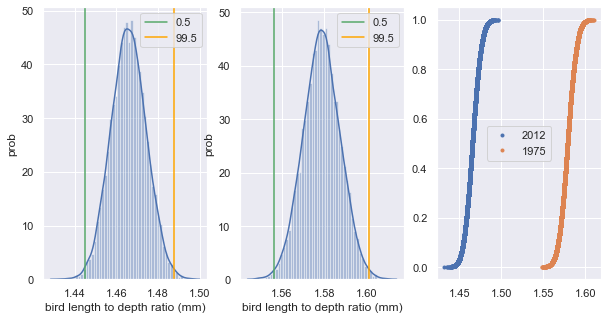

In [398]:
np.random.seed(42)

dist_a=bl_2012/bd_2012
dist_b=bl_1975/bd_1975
size=10000
xlabel='bird length to depth ratio (mm)'

mean_a = np.mean(dist_a)
mean_b = np.mean(dist_b)

bs_reps_a = draw_bs_reps(dist_a,np.mean,size)
bs_reps_b = draw_bs_reps(dist_b,np.mean,size)

fig,ax=plt.subplots(1,3)

sns.distplot(bs_reps_a,ax=ax[0])

ci = np.percentile(bs_reps_a,[.5,99.5])
ax[0].axvline(x=ci[0],label='0.5',color='g')
ax[0].axvline(x=ci[1],label='99.5',color='orange')
print(ci)

ax[0].set_xlabel(xlabel)
ax[0].set_ylabel('prob')
ax[0].legend()

sns.distplot(bs_reps_b,ax=ax[1])

ci = np.percentile(bs_reps_b,[.5,99.5])
ax[1].axvline(x=ci[0],label='0.5',color='g')
ax[1].axvline(x=ci[1],label='99.5',color='orange')
print(ci)

ax[1].set_xlabel(xlabel)
ax[1].set_ylabel('prob')
ax[1].legend()

x,y=ecdf(bs_reps_a)
ax[2].plot(x,y,'.',linestyle='none',label='2012')

x,y=ecdf(bs_reps_b)
ax[2].plot(x,y,'.',linestyle='none',label='1975')
ax[2].legend()

0.22622047244094645
0.0


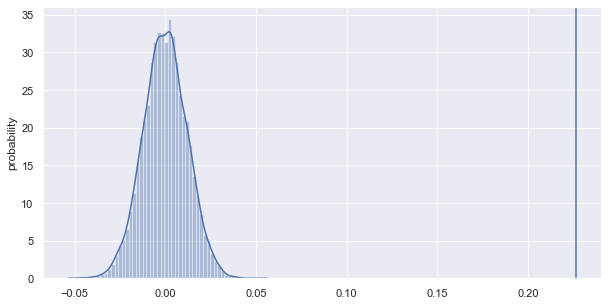

In [401]:
p,ax=procedure_bs_diff_means_two_sampled(dist_b,dist_a,size=10000,xlabel='')

### EDA of heritability

#### Correlation parents and offspring

In [439]:
parents_scadens = pd.read_csv('datasets/scandens_beak_depth_heredity.csv')
parents_scadens['specie'] = 'scanden'


parents_fortis = pd.read_csv('datasets/fortis_beak_depth_heredity.csv')
parents_fortis['mid_parent'] = parents_fortis[['Male BD','Female BD']].mean(axis=1)
parents_fortis = parents_fortis[['mid_parent','Mid-offspr', 'Male BD', 'Female BD']]
parents_fortis.columns = ['mid_parent','mid_offspring', 'Male BD', 'Female BD']
parents_fortis['specie'] = 'fortis'

bd_parent_scandens = parents_scadens['mid_parent'].values
bd_parent_fortis = parents_fortis['mid_parent'].values
bd_offspring_scandens = parents_scadens['mid_offspring'].values
bd_offspring_fortis = parents_fortis['mid_offspring'].values

parents = parents_scadens.append(parents_fortis)
parents.head()

,mid_parent,mid_offspring,specie,Male BD,Female BD
0,8.3318,8.4190,scanden,NaN,NaN
1,8.4035,9.2468,scanden,NaN,NaN
2,8.5317,8.1532,scanden,NaN,NaN
3,8.7202,8.0089,scanden,NaN,NaN
4,8.7089,8.2215,scanden,NaN,NaN


The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

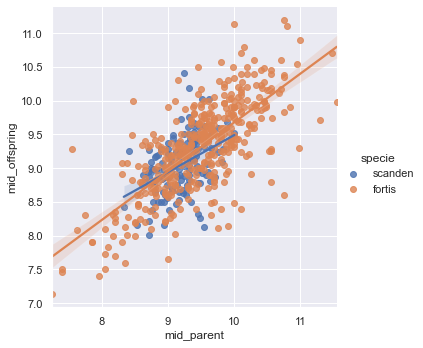

In [436]:
sns.lmplot(data=parents,x='mid_parent',y='mid_offspring',hue='specie')

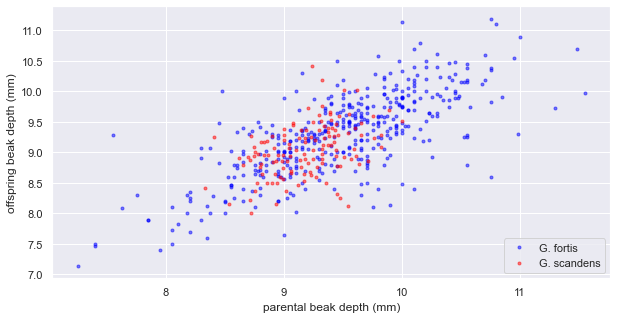

In [437]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

In [438]:
print(pearsonr(bd_parent_scandens,bd_offspring_scandens))
print(pearsonr(bd_parent_fortis,bd_offspring_fortis))

(0.41170636294012586, 1.1362967123975672e-06)
(0.7283412395518485, 1.8039661676442582e-69)


In [441]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens,bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens,bd_offspring_scandens,pearson_r,1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis,pearson_r,1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.4117063629401258 [0.26949672 0.536535  ]
G. fortis: 0.7283412395518487 [0.66622666 0.77718482]


#### Measuring heritability

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [443]:
# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685982 [0.3515981  0.74589844]
G. fortis: 0.7229051911438159 [0.64651891 0.79971344]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

 #### Is beak depth heritable at all in G. scandens?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

0.5485340868685982
0.0


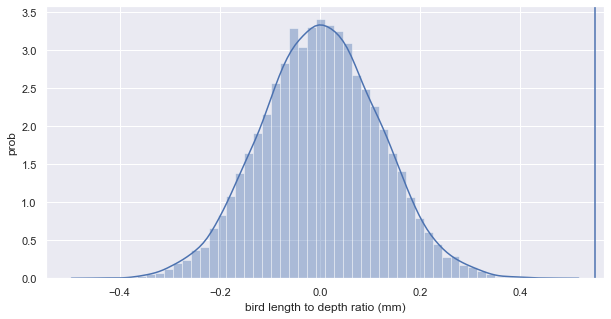

In [446]:
observed_value = heritability(bd_parent_scandens,bd_offspring_scandens)
print(observed_value)

# Initialize array of replicates: perm_replicates
perm_reps = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_reps[i] = heritability(bd_parent_permuted,bd_offspring_scandens)


ax=sns.distplot(perm_reps)
ax.axvline(x=observed_value)
ax.set_xlabel('heritability in beak depth - sandens')
ax.set_ylabel('prob')

p_value = np.sum(perm_reps>=observed_value)/len(perm_reps)
print(p_value)

You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis.